## Learning outcomes

* Bar chart are for categorical variables. Sort the values [most preferred]
* For Ratings/ Ordered variable don’t order the values
 * Education Qualification
 * Income levels
 * Satisfaction/Sleep quality/Back pain score
* Usage of 100% stacked bar or column charts to show the comparison of sub levels[of categorical variable] across another categorical variable or for the rating variables
* Line chart is to show the trends and seasonalities of a numeric variable over date variable
* Area chart is to show the conflicting volumes clearly
* Use Pie charts and donut charts with not more than 5 levels
* Scatter plot to study the relationship between 2 numeric variables
* Color [categorical variable] Size [Numeric] features can be added to the scatter plot, which enable to visualize the data in 4 dimensions
* Sub grouping will add the 5 th dimension
* Use of Map plots in the case of visualizing the geographical data
* Log scaling might be needed if the data is in the rage from 10 - 10 billion/million
* One chart/story per slide



In [1]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()


### Basic Plots

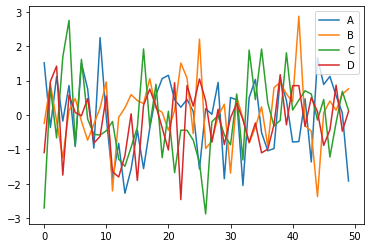

In [2]:
arr_1 = np.random.randn(50,4)
df_1 = pd.DataFrame(arr_1,columns = ['A',"B",'C','D'])
df_1.head()
df_1.plot()

In [3]:
df_1.head()

,A,B,C,D
0,1.516848,-0.243694,-2.704127,-1.093905
1,-0.364166,0.910442,0.796622,0.972893
2,1.115444,-0.173208,-0.665644,1.419667
3,-0.177858,-1.244016,1.686151,-1.747345
4,0.856300,0.126530,2.751933,0.578922


## Line Charts

In [4]:
import plotly.graph_objs as go
from pandas_datareader import data

### Bar charts

In [5]:
# Get population change in US by querying for US data
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')


In [6]:
df_tips = sns.load_dataset("tips")

In [7]:
# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker')


In [ ]:
# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker', barmode='group')


In [ ]:
# Create a stacked bar with more customization
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})


In [ ]:
# Display pop data for countries in Europe in 2007 greater than 2000000
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")


In [ ]:
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig

In [ ]:
df_europe = df_europe.sort_values(by = 'pop', ascending = False)
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig

In [ ]:
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)

In [ ]:
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)


### Scatter Plot

In [ ]:
# Use included Iris data set
df_iris = px.data.iris()
# Create a scatter plot by defining x, y, different color for count of provided
# column, size based on supplied column and additional data to display on hover
px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])


In [ ]:

# Create a customized scatter with black marker edges with line width 2, opaque
# and colored based on width. Also show a scale on the right
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_iris.sepal_width, y=df_iris.sepal_length,
    mode='markers',
    marker_color=df_iris.sepal_width,
    text=df_iris.species,
    marker=dict(showscale=True)
))
fig.update_traces(marker_line_width=2, marker_size=10)



### pie chart

In [ ]:
# Create Pie chart of the largest nations in Asia
# Color maps here plotly.com/python/builtin-colorscales/
df_samer = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
px.pie(df_samer, values='pop', names='country', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)



In [ ]:
# Customize pie chart
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal','Psychic', 'Fire', 'Ground'], 
                       values=[110,90,80,80,70,60])])
# Define hover info, text size, pull amount for each pie slice, and stroke
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

In [ ]:
# Stack histograms based on different column data
df_tips = px.data.tips()
px.histogram(df_tips, x="total_bill")

In [ ]:
# Stack histograms based on different column data
df_tips = px.data.tips()
px.histogram(df_tips, x="total_bill", color="sex")

In [ ]:
px.histogram(df_tips, x="total_bill", nbins = 10,color="sex")

In [ ]:
# create the bins
counts, bins = np.histogram(df_tips.total_bill, bins=range(0, 60, 5))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()

In [ ]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median 
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
df_tips = px.data.tips()
# We can see which sex tips the most, points displays all the data points
px.box(df_tips, x='sex', y='tip', points='all')

# Display tip sex data by day
px.box(df_tips, x='day', y='tip', color='sex')



In [ ]:
# Adding standard deviation and mean
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                    boxmean='sd'))



In [ ]:
# Create a heatmap using Seaborn data
flights = sns.load_dataset("flights")
flights

# You can set bins with nbinsx and nbinsy
fig = px.density_heatmap(flights, x='year', y='month', z='passengers', 
                         color_continuous_scale="Viridis")
fig

# You can add histograms
fig = px.density_heatmap(flights, x='year', y='month', z='passengers', 
                         marginal_x="histogram", marginal_y="histogram")
fig

In [ ]:
# You can color complex maps like we do here representing unemployment data

# Allows us to grab data from a supplied URL
from urllib.request import urlopen
# Used to decode JSON data
import json
# Grab US county geometry data
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Grab unemployment data based on each counties Federal Information Processing number
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

# Draw map using the county JSON data, color using unemployment values on a range of 12
fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig

In [ ]:
# You can create numerous subplots
df_tips = px.data.tips()
px.scatter(df_tips, x="total_bill", y="tip", color="smoker", facet_col="sex")



In [ ]:
# We can line up data in rows and columns
px.histogram(df_tips, x="total_bill", y="tip", color="sex", facet_row="time", facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})


### Animation Charts

In [ ]:
# Create an animated plot that you can use to cycle through continent
# GDP & life expectancy changes
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x="gdpPercap", y="lifeExp", animation_frame="year", 
           animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])



In [ ]:
# Watch as bars chart population changes
px.bar(df_cnt, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4*10**9])